In [33]:
import pandas as pd
import cairo
import numpy as np
import math
import networkx as nx
import matplotlib as mpl
from matplotlib import pyplot as plt

In [34]:
# create attribute list
# easy for this file because the first 6 columns are in fact attribute list
attr_list = pd.read_csv('HTTLPR.csv', usecols=[0, 1, 2, 3, 4, 5])
attr_list['PaperID'] = attr_list.index

In [35]:
data = pd.read_csv("HTTLPR.csv") #reading the .csv file (excel spreadsheet)
new = pd.DataFrame(np.zeros(shape=(73, 73)), columns=data['Study'], index=data['Study']) #making a data frame

In [36]:
# create edge list
matrix = pd.read_csv('HTTLPR.csv')
matrix = matrix.iloc[:, 6:]

In [37]:
# search_for_alias
search_dict = pd.Series(attr_list['PaperID'].values, index=attr_list['Study']).to_dict()
search_dict_reverse = pd.Series(attr_list['Study'].values, index=attr_list['PaperID']).to_dict()
matrix.columns = [search_dict[x] for x in matrix.columns]

In [38]:
for a in data['Study']:
    for b, v in zip(data['Study'],data[a]):
        if v == 'X':
            new.at[a, b] = 1
print(len(b))

9


In [39]:
#g = nx.generators.directed.kamada_kawai_layout(75, 3, 0.5)
g = nx.generators.directed.random_k_out_graph(75, 3, 0.5)
pos = nx.layout.spring_layout(g)

In [40]:
#node_sizes = [10 + i for i in range(len(g))]
M = g.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [i for i in range(M)]

In [41]:
study = attr_list['Study'].to_list()
outcome = attr_list['Outcome'].to_list()

In [42]:
coloring = []
for node in g:
    if node < 0.1:
        coloring.append('pink')
    elif node > 0.9:
        coloring.append('green')
    else:
        coloring.append('blue')

In [43]:
labelss = {}
for i, val in enumerate(study):
    labelss[i] = val

In [44]:
edge_list = []
for i in range(0, matrix.shape[0]):
    for j in range(0, matrix.shape[1]):
        if isinstance(matrix.iloc[i, j], str):
            s = matrix.iloc[i, j]
            if s.replace(" ", "") == "X":
                edge_list.append((i, j))

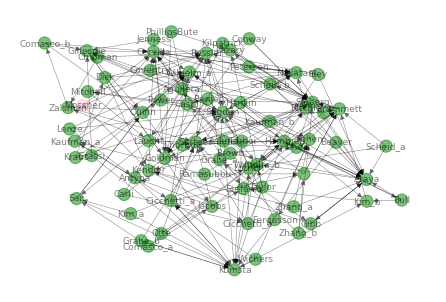

In [45]:
nx.draw(
    g,
    labels=labelss,
    with_labels=True,
    node_size=150, #node_sizes,
    width=0.5,
    font_size=9,
    alpha=0.5,
    node_color=coloring
)

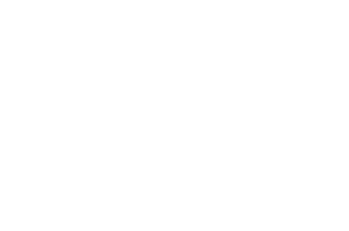

In [46]:
ax = plt.gca()
ax.set_axis_off()
plt.show()

In [47]:
g_sim = nx.generators.directed.random_k_out_graph(75, 2, 0.5)
sim_edge_list = []
year_gap = 2

In [48]:
# degree centrality (IN) for graph g
g_degree = nx.in_degree_centrality(g)

In [49]:
type(g_degree)

dict

In [50]:
for i in year:
    #print("i = ", i)
    for j in range(len(year)):
        if year[j] - i >= year_gap:
            sim_edge_list.append((year[j], i))

NameError: name 'year' is not defined

In [51]:
print(len(sim_edge_list))

0


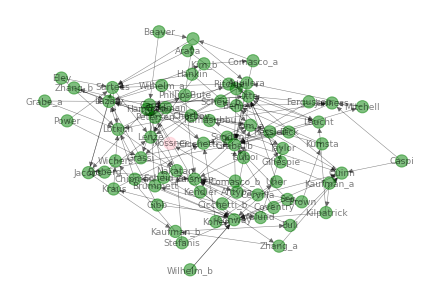

In [52]:
nx.draw(
    g_sim,
    labels=labelss,
    with_labels=True,
    node_size=150, #node_sizes,
    width=0.5,
    font_size=9,
    alpha=0.5,
    node_color=coloring
)

In [53]:
plt.show()

In [54]:
g_degree = nx.in_degree_centrality(g)
print(g_degree)
g_sim_degree = nx.in_degree_centrality(g_sim)

{0: 0.0, 1: 0.04054054054054054, 2: 0.0, 3: 0.013513513513513514, 4: 0.02702702702702703, 5: 0.0945945945945946, 6: 0.06756756756756757, 7: 0.14864864864864866, 8: 0.20270270270270271, 9: 0.13513513513513514, 10: 0.0, 11: 0.0, 12: 0.16216216216216217, 13: 0.0, 14: 0.02702702702702703, 15: 0.02702702702702703, 16: 0.0, 17: 0.0, 18: 0.013513513513513514, 19: 0.0, 20: 0.16216216216216217, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.05405405405405406, 27: 0.14864864864864866, 28: 0.0, 29: 0.013513513513513514, 30: 0.04054054054054054, 31: 0.013513513513513514, 32: 0.04054054054054054, 33: 0.0, 34: 0.08108108108108109, 35: 0.0, 36: 0.22972972972972974, 37: 0.04054054054054054, 38: 0.0, 39: 0.0, 40: 0.05405405405405406, 41: 0.04054054054054054, 42: 0.0, 43: 0.0, 44: 0.10810810810810811, 45: 0.02702702702702703, 46: 0.0, 47: 0.13513513513513514, 48: 0.0, 49: 0.10810810810810811, 50: 0.1891891891891892, 51: 0.04054054054054054, 52: 0.02702702702702703, 53: 0.20270270270270271, 54: 0.0, 

<BarContainer object of 0 artists>

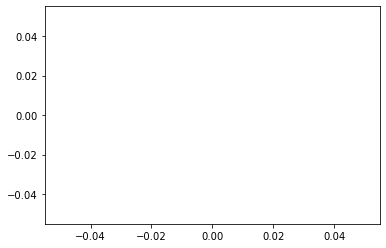

In [55]:
degree_ratio = pd.DataFrame(columns=['paperID','degree_ratio'])
plt.bar(degree_ratio['paperID'], degree_ratio['degree_ratio'], width=0.80, color="b")

In [56]:
last_generation = []
for idx, degree in enumerate(g_degree):
    if g_sim_degree[idx]!=0:
        degree_ratio = degree_ratio.append({'paperID': idx, 'degree_ratio': round(g_degree[idx] / g_sim_degree[idx],3)}, ignore_index=True)
    else:
        last_generation.append(idx)

In [57]:
low_cutoff = 0.1
high_cutoff = 0.9
idx_low = degree_ratio[degree_ratio['degree_ratio'] < low_cutoff].index.tolist()
idx_low = [int(item) for item in idx_low]

In [58]:
idx_high = degree_ratio[degree_ratio['degree_ratio'] > high_cutoff].index.tolist()
idx_high = [int(item) for item in idx_high]

In [59]:
# when you get sim_g working, then 
# g_sim_degree = nx.in_degree_centrality(g_sim)

In [60]:
# if you have both g_degree and g_sim_degree
# you can calculate degree_ratio

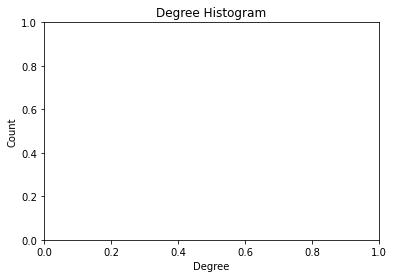

In [61]:
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()